# EDA
* Explore
* Descriptive Statistics
    * Centeral tendency
    * Variance and range
    * percentiles   
* Categorical Data
    * Frequency
    * contingency table
* Applied Visualization
    * Box Plot
    * Distribution
    * Scatter Plot
* Correlation
    * Covariance and correlation

In [1]:
# import libs
import pandas as pd
import seaborn as sns


In [2]:
# load example data
# flights_long = sns.load_dataset("flights")

# load iris dataset
# iris = sns.load_dataset("iris")

# read twitter data
twitter = pd.read_csv("../assets/twitter.csv")


In [3]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Descriptive Statistics

In [4]:
twitter.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [31]:
iris.max(numeric_only=True) - iris.min(numeric_only=True)

sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64

In [33]:
twitter

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [34]:
twitter["len"] = twitter.tweet.apply(len)

In [35]:
twitter.describe()

,id,label,len
count,31962.000000,31962.000000,31962.000000
mean,15981.500000,0.070146,84.739628
std,9226.778988,0.255397,29.455749
min,1.000000,0.000000,11.000000
25%,7991.250000,0.000000,63.000000
50%,15981.500000,0.000000,88.000000
75%,23971.750000,0.000000,108.000000
max,31962.000000,1.000000,274.000000


## Categorical Data

In [12]:
iris.select_dtypes(exclude=[float]).describe()

,species
count,150
unique,3
top,setosa
freq,50


In [26]:
pd.crosstab(iris["species"], iris["petal_length"])

petal_length,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.9,3.0,...,5.7,5.8,5.9,6.0,6.1,6.3,6.4,6.6,6.7,6.9
species,,,,,,,,,,,,,,,,,,,,,
setosa,1,1,2,7,13,13,7,4,2,0,...,0,0,0,0,0,0,0,0,0,0
versicolor,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
virginica,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,1,1,1,2,1


In [38]:
twitter.label.value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

## Applied Visualization

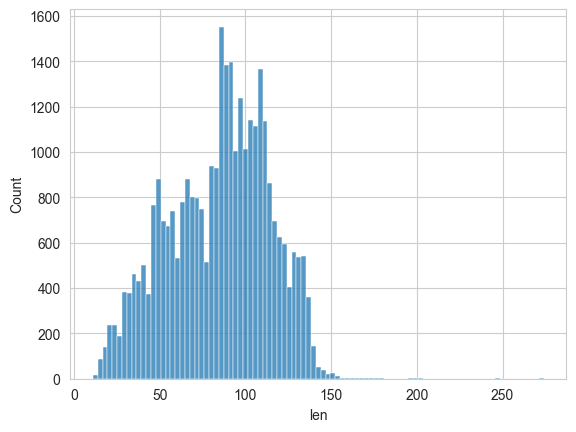

In [43]:
ax = sns.histplot(data=twitter, x="len")

<Axes: ylabel='len'>

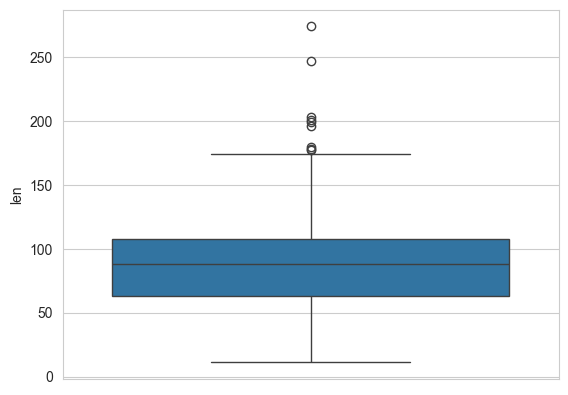

In [49]:
sns.boxplot(data=twitter, y="len")

## Correlation

In [9]:
iris.select_dtypes(include=[float]).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

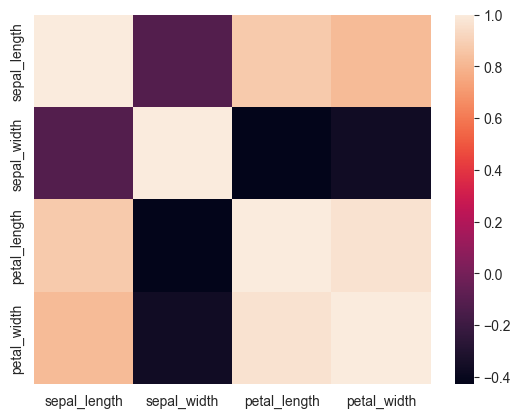

In [13]:
sns.heatmap(iris.select_dtypes(include=[float]).corr())

<Axes: xlabel='petal_length', ylabel='petal_width'>

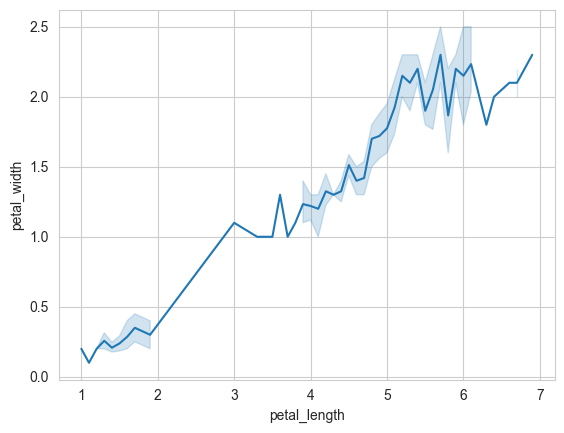

In [14]:
sns.lineplot(data=iris, x="petal_length", y="petal_width")

In [15]:
iris.groupby(by="species").corr()

sepal_length  sepal_width  petal_length  petal_width
species                                                                      
setosa     sepal_length      1.000000     0.742547      0.267176     0.278098
           sepal_width       0.742547     1.000000      0.177700     0.232752
           petal_length      0.267176     0.177700      1.000000     0.331630
           petal_width       0.278098     0.232752      0.331630     1.000000
versicolor sepal_length      1.000000     0.525911      0.754049     0.546461
           sepal_width       0.525911     1.000000      0.560522     0.663999
           petal_length      0.754049     0.560522      1.000000     0.786668
           petal_width       0.546461     0.663999      0.786668     1.000000
virginica  sepal_length      1.000000     0.457228      0.864225     0.281108
           sepal_width       0.457228     1.000000      0.401045     0.537728
           petal_length      0.864225     0.401045      1.000000     0.322108
           petal_width       0.281108     0.537728      0.322108     1.000000

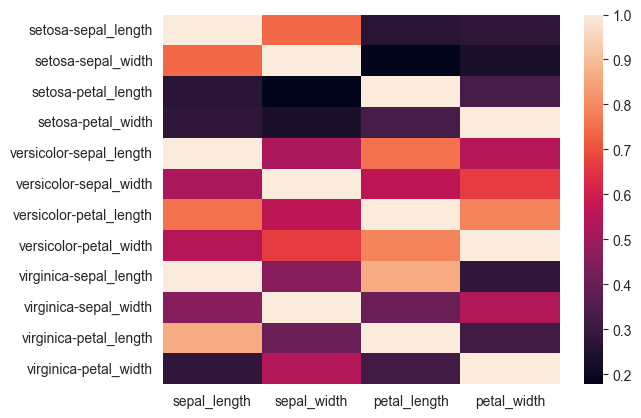

In [21]:
ax = sns.heatmap(iris.groupby(by="species").corr())
_ = ax.set_ylabel("")

In [50]:
twitter[["label", "len"]].corr()

,label,len
label,1.000000,0.050802
len,0.050802,1.000000


<Axes: >

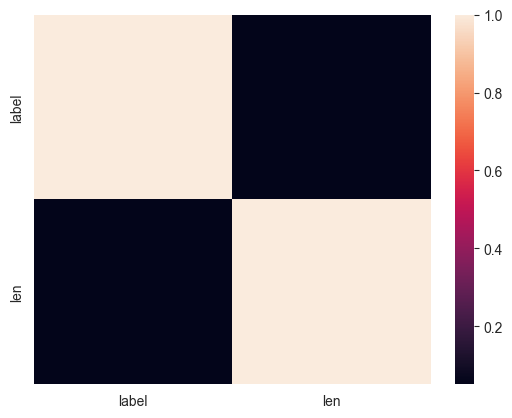

In [51]:
sns.heatmap(twitter[["label", "len"]].corr())